
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

**Neuron:** A neuron is a single unit of what makes up a neural network.

**Input Layer:** The input layer of a neural network is the first layer of the neural network. The data you want the neural network to learn is inserted to the network at this layer.

**Output Layer:** The output layer is where the neural network's prediction/answer is relayed.

**Activation:** Activation is whether or not a neuron in the neural network is going to pass its information on to the next layer of the network. If it does pass it on, the neuron is activated. If not, the neuron is not activated.

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

- Back-propagation is a process in training neural networks that goes "backwards"--it goes from output to input layer. Back-propagation takes places after the model is run through forward. As it goes backwards, back-propagation calculates what adjustments can be made to either the weight or bias at each node to push the output in the desired direction. It calculates the necessary adjustments (gradient) by taking the partial derivatives of each node.

- Gradient descent is a process of optimizing the loss. Using a gradient, it determines the direction of the next step to take towards optimizing. The learning rate determines the size of the step. The smaller the learning rate, the smaller the step. The larger the learning rate, the larger the step. Gradient descent takes these steps, with the goal of converging on the lowest point. The lowest point will yield the smallest loss function for the model.

- Gradient descent uses the gradient that back-propagation calculates to find its way to towards the minima. The gradient from back-propagation tells gradient descent which direction to go in.

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

The inputs go into the perpectron. They are processed by some function, and then multiplied by the activation function. If the result is large enough, the perpectron is activated and yields results--outputs.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape

(300, 2)

In [3]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [4]:
2**2

4

In [5]:
4**4

256

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model
model1 = Sequential([Dense(1, activation='sigmoid')])

model1.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

h1 = model1.fit(X, y,
                epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 923us/step - loss: 0.7654 - accuracy: 0.5969
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8250 - accuracy: 0.4949
Epoch 3/10
10/10 [==============================] - 0s 897us/step - loss: 0.8141 - accuracy: 0.5405
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8375 - accuracy: 0.5171
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8027 - accuracy: 0.5519
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8622 - accuracy: 0.5406
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8366 - accuracy: 0.5097
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8472 - accuracy: 0.5150
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.8439 - accuracy: 0.5185
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8358 - accuracy: 0.4969


In [7]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [8]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'sparse': False,
   'ragged': False,
   'name': 'dense_input'}},
 {'class_name': 'Dense',
  'config': {'name': 'dense',
   'trainable': True,
   'dtype': 'float32',
   'units': 1,
   'activation': 'sigmoid',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}}]

In [9]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [10]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [11]:
mycallback = myCallback()
# build and fit model
model2 = Sequential([
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

h2 = model2.fit(X, y,
                epochs=100,
                callbacks=[mycallback])

Epoch 1/100
10/10 [==============================] - 0s 928us/step - loss: 0.6958 - accuracy: 0.5251
Epoch 2/100
10/10 [==============================] - 0s 969us/step - loss: 0.6736 - accuracy: 0.6273
Epoch 3/100
10/10 [==============================] - 0s 855us/step - loss: 0.6532 - accuracy: 0.6613
Epoch 4/100
10/10 [==============================] - 0s 874us/step - loss: 0.6422 - accuracy: 0.7659
Epoch 5/100
10/10 [==============================] - 0s 955us/step - loss: 0.6222 - accuracy: 0.8761
Epoch 6/100
10/10 [==============================] - 0s 918us/step - loss: 0.6056 - accuracy: 0.8838
Epoch 7/100
10/10 [==============================] - 0s 907us/step - loss: 0.5896 - accuracy: 0.9161
Epoch 8/100
10/10 [==============================] - 0s 909us/step - loss: 0.5711 - accuracy: 0.9507
Epoch 9/100
10/10 [==============================] - 0s 970us/step - loss: 0.5471 - accuracy: 0.9576
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy

In [12]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [13]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [14]:
X.shape, y.shape

((300, 2), (300,))

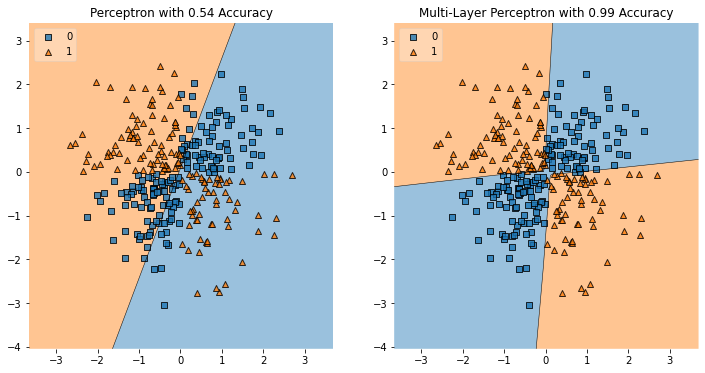

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

1. Model 1 only gets 50% accuracy because there is only one node. It is a single perceptron, and single perceptrons are limited to linear separations. We see that the data cannot be linearly separated. We would need 2 lines, because the data points seem to be separated into "quadrants". With two interecting lines, predictions would be more accurate.

2. A multi-layer perceptron will answer this probelm. Each layer represents a space vector, and each one tends to be unique. The single perceptron has a single layer, so it only has a single vector. The multi-layer perceptron has 2 layers, each layer is a vector, and therefore we get the 2 intersecting lines we need. The two intersecting "lines" are the 2 intersecting space vectors.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0


In [17]:
# Create an input matrix named 'X' store it in a 2D numpy array
X = df.drop(columns='target')

# Create an output vector for the labels named 'Y', store it in 1D numpy array
Y = df['target']

In [18]:
X.shape

(303, 13)

In [19]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [20]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [21]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
def create_model(learning_rate, act_funct):
    """
    Creates and compiles a Keras model with 2 hidden layers.
    
    Parameters
    ----------
    learning_rate: float
        The learning rate for the Adam optimizer
    
    act_funct: string
        The name of the activation function for the 2 hidden layers
        
    Returns
    -------
    A compiled Keras model
    
    """
    model = Sequential([
        Dense(100, activation=act_funct),
        Dense(50, activation=act_funct),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [22]:
# Visible Testing
assert create_model(0.001, 'relu').__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [23]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
model = KerasClassifier(build_fn=create_model)

In [24]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [25]:
# baseline accuracy of model
base_model = create_model(0.001, 'relu')
base_model_history = base_model.fit(X, Y, epochs=5)
accuracy = base_model_history.history['accuracy']
print("Baseline accuracy of the model:", max(accuracy))

Epoch 1/5
10/10 [==============================] - 0s 926us/step - loss: 12.2430 - accuracy: 0.5314
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 3.4351 - accuracy: 0.4652
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 1.1457 - accuracy: 0.5934
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.9628 - accuracy: 0.6479
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.8292 - accuracy: 0.6737
Baseline accuracy of the model: 0.669966995716095


In [26]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 
param_grid = {
    'learning_rate': (0.001, 0.1),
    'act_funct': ('relu', 'selu')
}

In [27]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [28]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
gs = GridSearchCV(model,
                  param_grid,
                  n_jobs=1,
                  verbose=1,
                  cv=3
                  )

grid_result = gs.fit(X, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
10/10 [==============================] - 0s 1ms/step - loss: 100.1771 - accuracy: 0.4720


In [29]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.5445544719696045 using {'act_funct': 'selu', 'learning_rate': 0.1}
Means: 0.4917491873105367, Stdev: 0.06875468259929249 with: {'act_funct': 'relu', 'learning_rate': 0.001}
Means: 0.45874587694803876, Stdev: 0.01234871118658905 with: {'act_funct': 'relu', 'learning_rate': 0.1}
Means: 0.39273926615715027, Stdev: 0.06534320952583478 with: {'act_funct': 'selu', 'learning_rate': 0.001}
Means: 0.5445544719696045, Stdev: 0.014002110305986236 with: {'act_funct': 'selu', 'learning_rate': 0.1}
